In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [2]:
gg = load_dataset()
from joblib import load, dump

y = [1], it's a 'cat' picture.


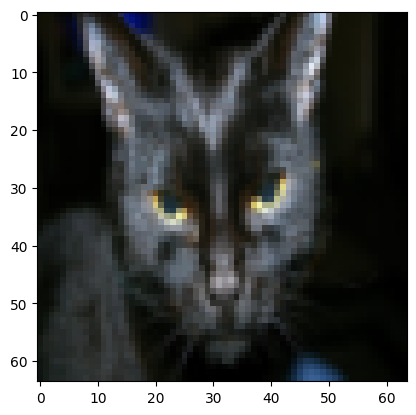

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [73]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig[:,1].shape[1]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [74]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

In [75]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [7]:
# x: a single image example. 209

In [76]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b = 0.0
    
    # YOUR CODE ENDS HERE

    return w, b

In [77]:
def sigmoid_other(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    denom = 1+np.exp(np.multiply(-1,z))
    s = np.divide(1,denom)
    # YOUR CODE ENDS HERE
    
    return s

In [78]:
def sigmoid(x: np.array):
    return(np.divide(1,(1+np.exp(-x))))

In [79]:
# cross entropy, binary label
def cross_entropy(y:np.array, yhat:np.array):
    return(-np.multiply(y,np.log(yhat)) - np.multiply((1-y), np.log(1-yhat))) 

In [25]:
# assume column vectors

In [80]:
def cost(a,b):
    losses = cross_entropy(a,b) # assume shape is just 
    return(np.divide(np.sum(losses), len(losses)))

### initalize the problem

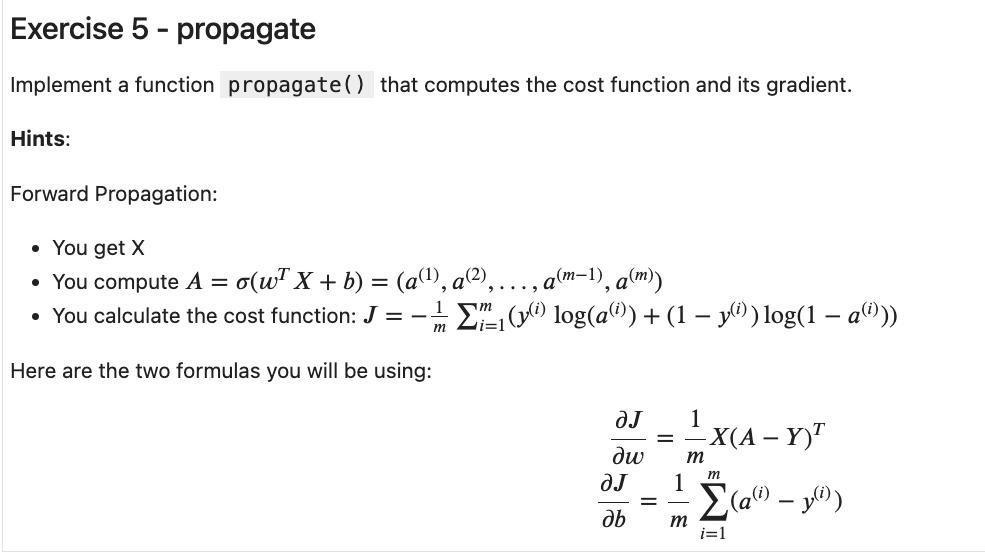

In [82]:
def propagate(X,Y,w,b):
    
    m = X.shape[1]
    
    # forward
    A = sigmoid_other(np.dot(w.T, X)+b) # this is just an activation for one layer
    J = -(1/m)*np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))) # cost; cross entropy
    
    dz = A-Y
    dJdw = (1/m)*np.matmul(X,dz.T)
    dJdb = (1/m)*np.sum(dz)
    
    cost = np.squeeze(np.array(J))
    
    return({'dw':dJdw, 'db':dJdb}, J)

In [83]:
#w = np.random.randn(train_set_x.shape[0], 6)
dim = train_set_x.shape[0]
w = np.zeros((dim,1))
b = 0.0

X = train_set_x
Y = train_set_y
propagate(X,y,w,b)

({'dw': array([[0.04720893],
         [0.06299841],
         [0.04923539],
         ...,
         [0.05074585],
         [0.0621259 ],
         [0.03245145]]),
  'db': 0.15550239234449761},
 0.6931471805599453)

In [149]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.01, print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        curr_grads, cost = propagate(X,Y,w,b)
        if i%500==0:
            print('Current cost is: {}'.format(cost))
        dJdb = curr_grads['db']
        dJdw = curr_grads['dw']
        
        b = b - learning_rate*dJdb
        w = w - learning_rate*dJdw
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dJdw,
             "db": dJdb}
    
    return params, grads, costs


In [150]:
params, grads, costs = optimize(w, b, X, y, print_cost=True)

Current cost is: 0.6931471805599453


In [151]:
def predict(w,b,X_test):
    # test samples
    # the learned parameters for the model
    # the model itself with weights and biases learned from data
    A = sigmoid_other(np.dot(w.T, X_test)+b) # this is just an activation for one layer
    A = (A[0] > 0.5).astype(int)
    print(A)
    return(float(np.sum(A))/float(X_test.shape[1]))
    

In [152]:
predict(params['w'], params['b'], test_set_x)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1]


0.84